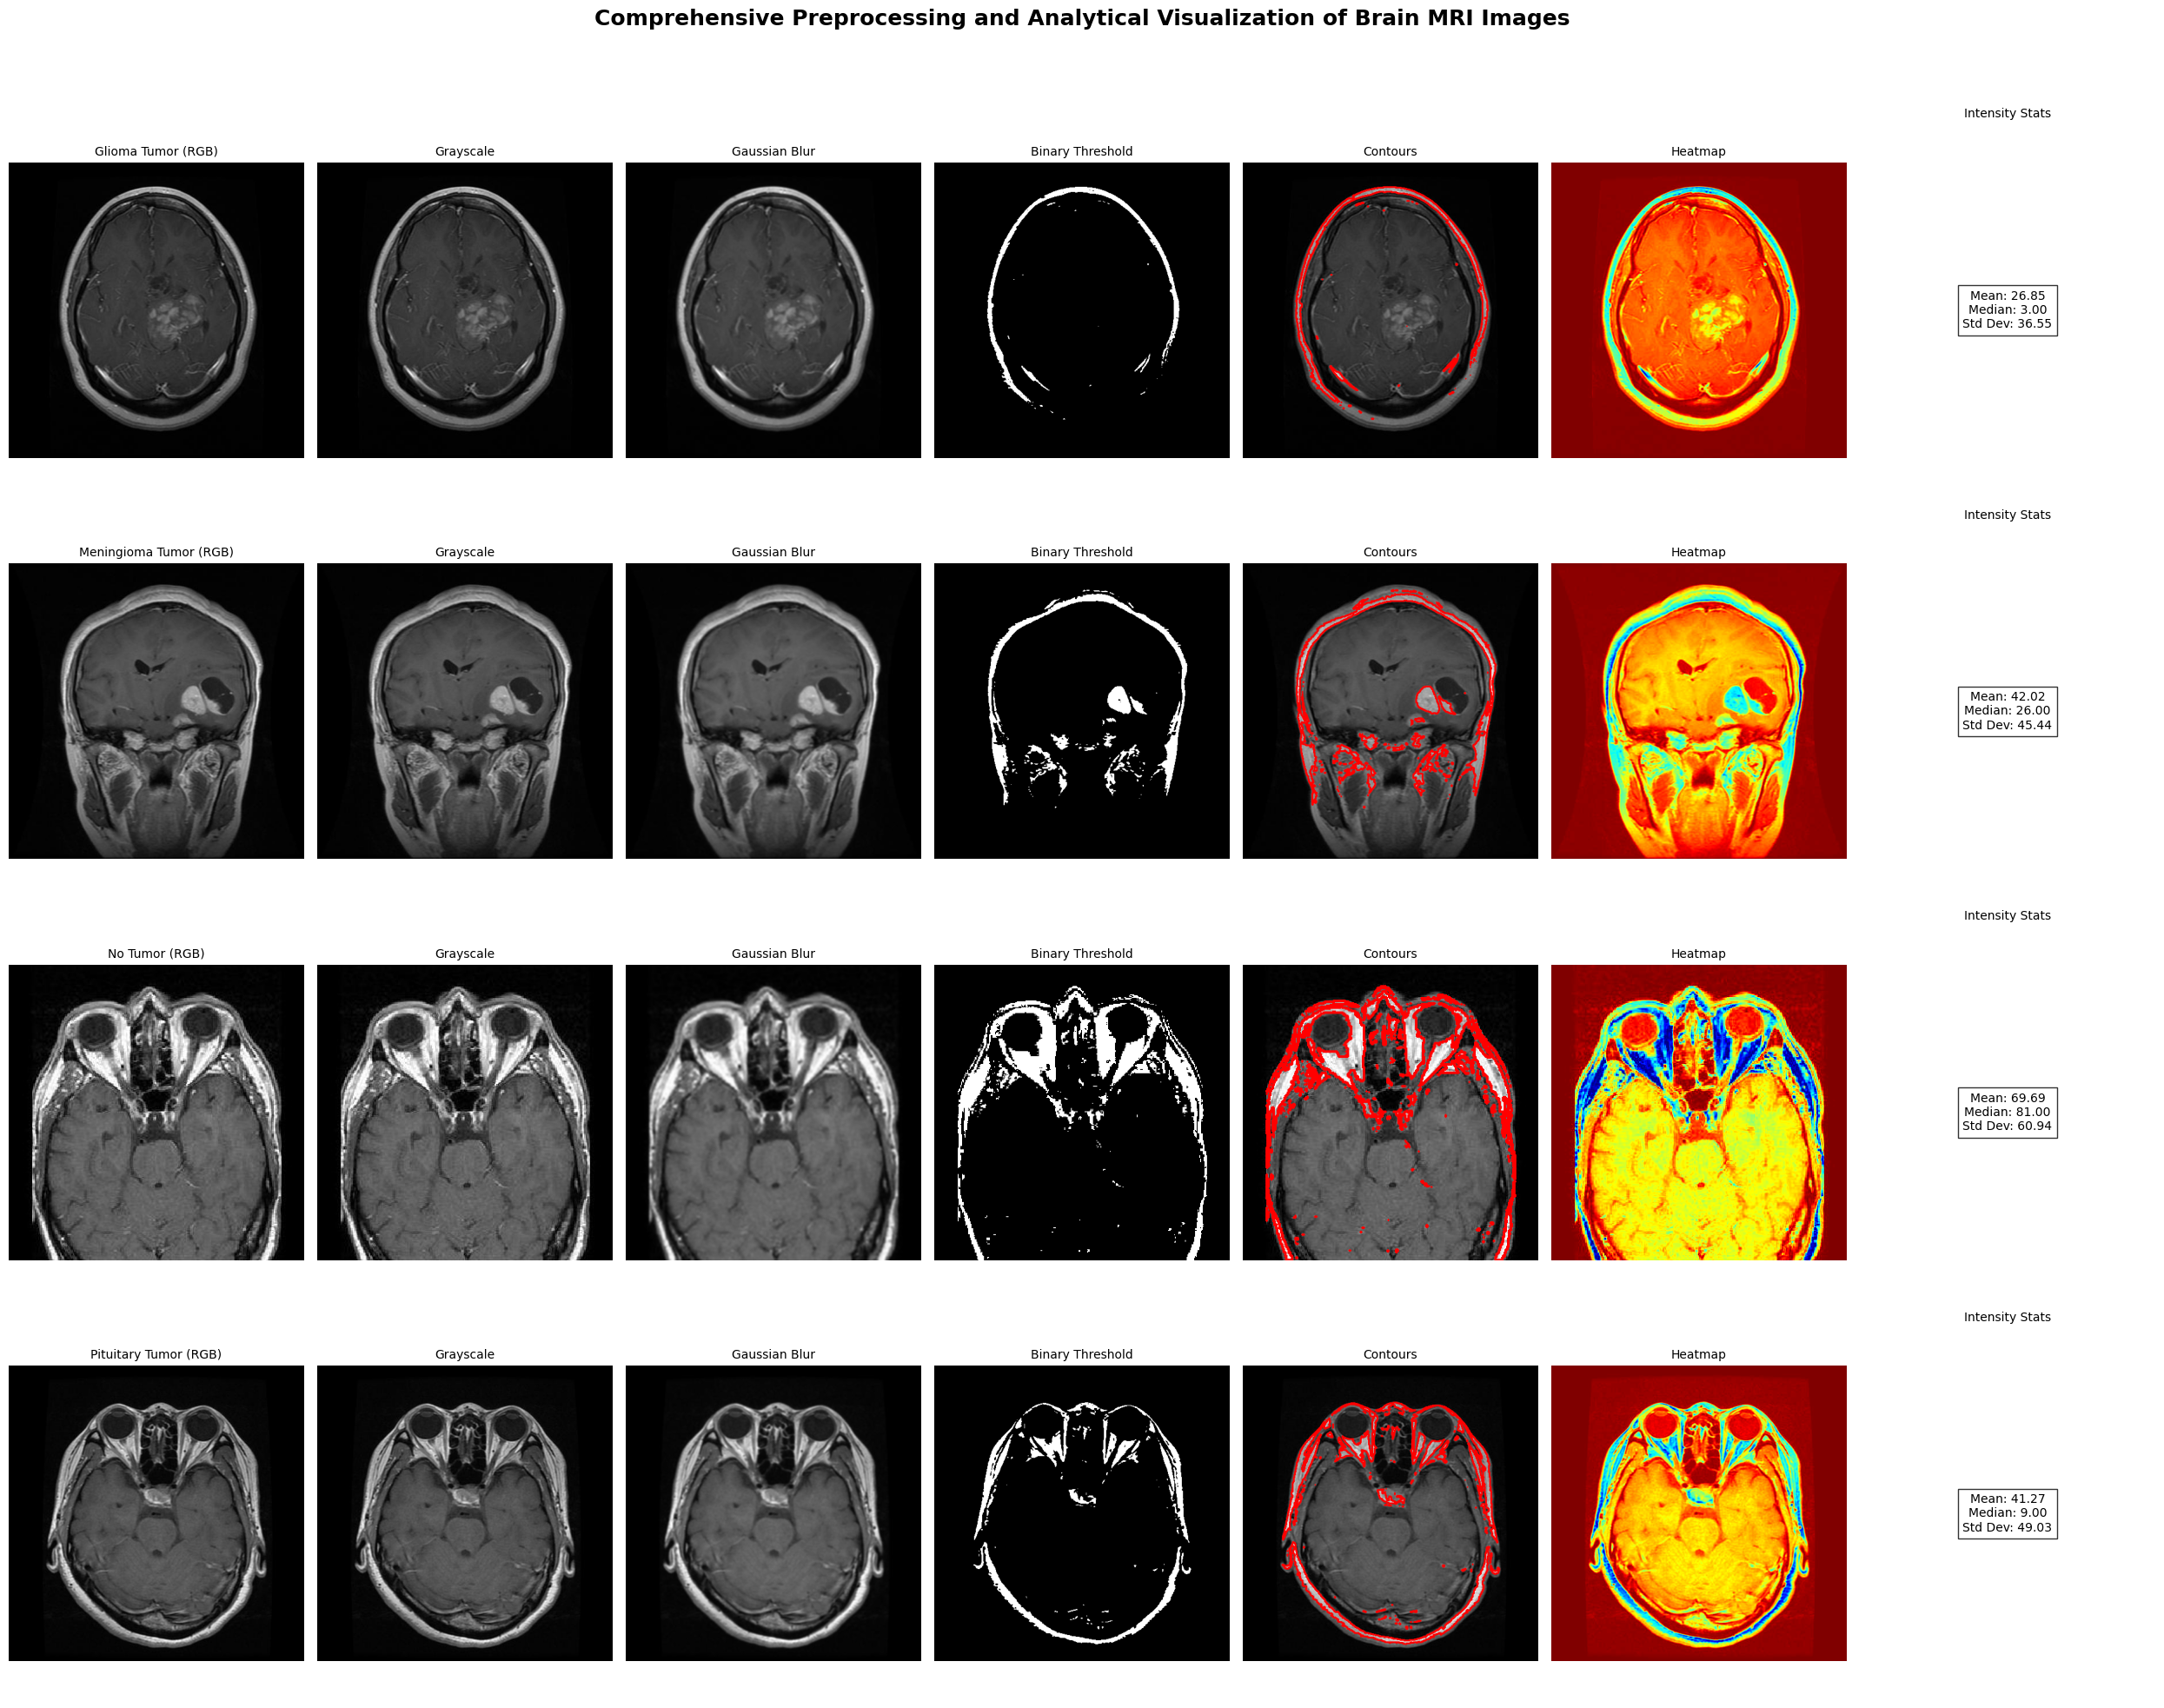

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths and their corresponding labels
images = [
    (r'DATASETS\TRAIL_DATA\TRAINING\glioma_tumor\gg (1).jpg', 'Glioma Tumor'),
    (r'DATASETS\TRAIL_DATA\TRAINING\meningioma_tumor\m (15).jpg', 'Meningioma Tumor'),
    (r'DATASETS\TRAIL_DATA\TRAINING\no_tumor\no_tumor.jpg', 'No Tumor'),
    (r'DATASETS\TRAIL_DATA\TRAINING\pituitary_tumor\p (1).jpg', 'Pituitary Tumor')
]

# Preprocess and visualize the images
fig, axes = plt.subplots(len(images), 7, figsize=(25, 20))
fig.suptitle("Comprehensive Preprocessing and Analytical Visualization of Brain MRI Images", fontsize=18, fontweight='bold')

for i, (image_path, label) in enumerate(images):
    # Read the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to Grayscale
    
    # Gaussian Blur
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    # Binary Thresholding
    _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    
    # Contour Detection
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_contours = cv2.drawContours(img_rgb.copy(), contours, -1, (255, 0, 0), 2)
    
    # Pixel Intensity Statistics
    mean_intensity = np.mean(img_gray)
    median_intensity = np.median(img_gray)
    std_intensity = np.std(img_gray)
    
    # Heatmap
    img_heatmap = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)
    
    # Plot Original RGB Image
    axes[i, 0].imshow(img_rgb)
    axes[i, 0].set_title(f"{label} (RGB)", fontsize=10)
    axes[i, 0].axis('off')
    
    # Plot Grayscale Image
    axes[i, 1].imshow(img_gray, cmap='gray')
    axes[i, 1].set_title("Grayscale", fontsize=10)
    axes[i, 1].axis('off')
    
    # Plot Gaussian Blurred Image
    axes[i, 2].imshow(img_blur, cmap='gray')
    axes[i, 2].set_title("Gaussian Blur", fontsize=10)
    axes[i, 2].axis('off')
    
    # Plot Thresholded Image
    axes[i, 3].imshow(img_thresh, cmap='gray')
    axes[i, 3].set_title("Binary Threshold", fontsize=10)
    axes[i, 3].axis('off')
    
    # Plot Contour Image
    axes[i, 4].imshow(img_contours)
    axes[i, 4].set_title("Contours", fontsize=10)
    axes[i, 4].axis('off')
    
    # Plot Heatmap
    axes[i, 5].imshow(img_heatmap)
    axes[i, 5].set_title("Heatmap", fontsize=10)
    axes[i, 5].axis('off')
    
    # Display Pixel Intensity Statistics
    axes[i, 6].text(0.5, 0.5, 
                    f"Mean: {mean_intensity:.2f}\n"
                    f"Median: {median_intensity:.2f}\n"
                    f"Std Dev: {std_intensity:.2f}",
                    fontsize=10, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))
    axes[i, 6].set_title("Intensity Stats", fontsize=10)
    axes[i, 6].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()
